# CH 2 Descriptive Statistics

## CH 2.1 Popular Data Display

no. 15
![2.1ex](https://raw.githubusercontent.com/ellickhou/Entrance-exam-of-Taiwan-AI-Academy/master/Notes-of-Beginning-Statistics/img/2.1ex.png?token=ALBR66QOCOFH43QJG4ERRCC5D5HA6)

[9, 12, 13, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 17, 18, 18, 19, 19, 20]
[0.05, 0.0, 0.0, 0.05, 0.05, 0.1, 0.3, 0.15, 0.05, 0.1, 0.1, 0.05]
[0.05, 0.05, 0.05, 0.1, 0.15, 0.25, 0.55, 0.7, 0.75, 0.85, 0.95, 1.0]


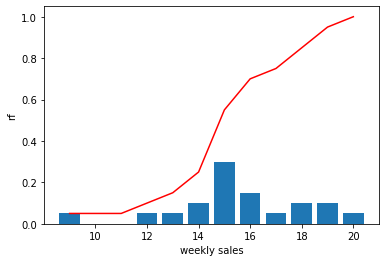

Ans:1)19, 2)20


In [241]:
import matplotlib.pyplot as plt
%matplotlib inline
ds = [20, 15, 14, 14, 18, 15, 17, 16, 16, 18, 15, 19, 12, 13, 9,
      19, 15, 15, 16, 15]
ds.sort()
rf_ds = [ds.count(i)/ len(ds) for i in range(min(ds),max(ds)+1) ]

sum_rf_ds = [round(sum(rf_ds[0:i]), 2) for i in range(1,len(rf_ds)+1) ]  # for i...要放在最外面，
print(ds)                                                      # 否則type 會被認定為generator
print(rf_ds)                                                   # 無法計算
print(sum_rf_ds)                                               # 因為上限不取，所以i從 0 開始取
fig, ax = plt.subplots(facecolor = (1,1,1))
with plt.rc_context({'axes.edgecolor':'white' ,
                     'xtick.color':'red', 'ytick.color':'green', 
                     'figure.facecolor':'red'}):
    ax.bar([i for i in range(min(ds),max(ds)+1)], rf_ds, label='rf')
    ax.plot([i for i in range(min(ds),max(ds)+1)], sum_rf_ds, color='r', label='sum of rf')
    ax.set_xlabel("weekly sales")
    ax.set_ylabel("rf")

plt.show()
print("Ans:1)19, 2)20")

## CH 2.2 Measures of Central Location
![2.2ex](https://raw.githubusercontent.com/ellickhou/Entrance-exam-of-Taiwan-AI-Academy/master/Notes-of-Beginning-Statistics/img/2.2ex.png?token=ALBR66R4DOC2GCSTU6QRBS25D5HDM)

In [36]:
import numpy as np
import statistics as stat
# A.
ds = np.array([5, -2, 6, 14, -3, 0, 1, 4, 3, 2, 5])
print("(a)","np",np.mean(ds), np.median(ds),"numpy沒有'mode' function", sep = "\n")
DS = [5, -2, 6, 14, -3, 0, 1, 4, 3, 2, 5]
print("stat", stat.mean(DS), stat.median(DS), stat.mode(DS), sep = "\n")
print("stat for np.array", stat.mean(ds), stat.median(ds), stat.mode(ds), sep = "\n")
print("\033[1;33m*np.array用np, list用stat\033[0m")
# B.
DS2 = [DS[i] + 3 for i in range(len(DS))]
print("(b)", stat.mean(DS2), stat.median(DS2), stat.mode(DS2), sep = "\n")
# C.
DS3 = [DS[i] - 6 for i in range(len(DS))]
print("(c)", stat.mean(DS3), stat.median(DS3), stat.mode(DS3), sep = "\n")


(a)
np
3.1818181818181817
3.0
numpy沒有'mode' function
stat
3.1818181818181817
3
5
stat for np.array
3
3
5
*np.array用np, list用stat
(b)
6.181818181818182
6
8
(c)
-2.8181818181818183
-3
-1


## CH 2.3 Measures of Variability
![2.3ex.1](https://raw.githubusercontent.com/ellickhou/Entrance-exam-of-Taiwan-AI-Academy/master/Notes-of-Beginning-Statistics/img/2.3ex.1.png)

目標:
1. 產生一元素個數為n的隨機list
2. 當mean != 0 時 重新生產一個
3. 當mean == 0 但 stdev >= 1 時 重新生產一個
4. 當stdev >= 1 時 重新生產一個
5. 當stdev < 1 但 mean != 0 時 重新生產一個

[list_generator exercise](https://github.com/ellickhou/Entrance-exam-of-Taiwan-AI-Academy/blob/master/Notes-of-Beginning-Statistics/list_generator%20exercise%20.ipynb)

In [15]:
import statistics as stat
import random
import time
ts = time.time()
def list_generator(list_len, interval_min, interval_max, float_digits):
    def num_generator(list_len, interval_min, interval_max, float_digits):
                                                  # 定義公式 num_generator，用來產生含有n個元素的隨機list
        nums = []                                 # 定義一個空list: nums
        while len(nums) < list_len:               # 當list的長度 < list_len 為 true 時
            rnum = round(random.uniform(interval_min, interval_max), float_digits) 
                                                  # 產生一個隨機數 rnum，範圍為 interval_min ~ interval_max
                                                  # 四捨五入至小數點第 float_digits 位
            nums += [rnum]                        # 將隨機數 rnum 加入 nums，nums 長度 < n 仍為 true 時，
                                                  # while 迴圈繼續
        return nums                               # 當 nums 長度 < list_len 為 false 時，回傳 nums，結束迴圈
    ds_unfiltered = num_generator(list_len, interval_min, interval_max, float_digits)      
                                                  # 定義沒篩過的 ds = list_generator的結果，也就是回傳值nums
    
    
    while stat.mean(ds_unfiltered) != 0:          # true 迴圈開始         
        ds_unfiltered = num_generator(list_len, interval_min, interval_max, float_digits)
                                                  # 產生新的直到 mean != 0 false ，也就是 mean == 0跳出迴圈
        if stat.mean(ds_unfiltered) != 0:         # 當mean != 0 時不進入下一層迴圈
            continue
        while stat.stdev(ds_unfiltered) >= 1:     # 當 stdev >= 1 true，
            ds_unfiltered = num_generator(list_len, interval_min, interval_max, float_digits)
                                                  # 產生新的，直到 stdev >= 1 false，也就是stdev < 1 跳出迴圈
                                                  # 跳出內層迴圈後，檢查 mean != 0 是否true，true 重新開始外層迴圈
                                                  # false 獲得同時滿足兩個條件的隨機數list
    while stat.stdev(ds_unfiltered) >= 1:
        ds_unfiltered = num_generatorr(list_len, interval_min, interval_max, float_digits)
        if stat.stdev(ds_unfiltered) >= 1:
            continue
        while stat.mean(ds_unfiltered) != 0:
            ds_unfiltered = num_generator(list_len, interval_min, interval_max, float_digits)
    
    ds_filtered = ds_unfiltered
    return ds_filtered
ds = list_generator(3, -1, 1, 1)
print("data set = ", ds,"mean =", stat.mean(ds), "stdev = ", stat.stdev(ds), sep = '\n')


data set = 
[0.3, -0.3, -0.0]
mean =
0.0
stdev = 
0.3


![2.3ex.2](https://raw.githubusercontent.com/ellickhou/Entrance-exam-of-Taiwan-AI-Academy/master/Notes-of-Beginning-Statistics/img/2.3ex.2.png)

In [16]:
import statistics as stat
ds_1 = [5, -2, 6, 14, -3, 0, 1, 4, 3, 2, 5]
ds_2 = [ds_1[i] + 3 for i in range(0, 11)]
ds_3 = [ds_1[i] - 6 for i in range(0, 11)]
print(stat.stdev(ds_1))
print(stat.stdev(ds_2))
print(stat.stdev(ds_3))
print("For stdev \'S\' = square root of S^2, S^2 = sum(xi - x_mean)^2/n-1,",
      "varies by (xi - x_mean) & n , since n doesn't change,",
      "sum(xi - x_mean) dominate the variety of S^2, ",
      "but add & subtract won't change the result of sum(xi - x_mean),",
      "(cause they vary linearly by add & subtract, they get bigger and smaller together)",
      "so the variances S^2 doesn't change, S won't change.", sep = "\n")

4.622081388685877
4.622081388685877
4.622081388685877
For stdev 'S' = square root of S^2, S^2 = sum(xi - x_mean)^2/n-1,
varies by (xi - x_mean) & n , since n doesn't change,
sum(xi - x_mean) dominate the variety of S^2, 
but add & subtract won't change the result of sum(xi - x_mean),
(cause they vary linearly by add & subtract, they get bigger and smaller together)
so the variances S^2 doesn't change, S won't change.


## CH 2.4 Relative Position of 
![2.4ex.1](https://raw.githubusercontent.com/ellickhou/Entrance-exam-of-Taiwan-AI-Academy/master/Notes-of-Beginning-Statistics/img/2.4ex.1.png)

1. 產生ds

    加入對應f次數的通勤時間x
2. 排序
3. 提取元素

In [119]:
import numpy as np
def ds_generator(target_dict):
    mins_need = list(target_dict.keys())
    f = list(target_dict.values())
    ds = []
    for i in range(len(mins_need)):
        ds += [mins_need[i]] * f[i]
    ds.sort()
    return ds

def percentile_calculator(target_dict, target_key):
    mins_need = list(target_dict.keys())
    f = list(target_dict.values())
    f_totle = sum(f)
    f_count = []
    for i in range(min(mins_need), target_key + 1):
        f_count += [target_dict[i]]
        
    f_count_sum = sum(f_count)
    return f_count_sum / f_totle

mins_f_dict = { 26:3, 27:4, 28:16, 29:12, 30:6, 31:2, 32:1}
mins_need = list(mins_f_dict.keys())
f = list(mins_f_dict.values())

ds = np.array(ds_generator(mins_f_dict))

percentile_30 =  percentile_calculator(mins_f_dict, 30)

print(mins_need, f, ds, sep = "\n")

print("Ans:", percentile_30, sep = "\n")

print(1 - percentile_30)

print("try np.percentile","取值在數值變換處為線性遞增","以93%時為30為例"
      ,np.percentile(ds, 93),np.percentile(ds, 94), sep = "\n")
print(percentile_calculator(mins_f_dict, 31))

[26, 27, 28, 29, 30, 31, 32]
[3, 4, 16, 12, 6, 2, 1]
[26 26 26 27 27 27 27 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 29
 29 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 31 31 32]
Ans:
0.9318181818181818
0.06818181818181823
try np.percentile
取值在數值變換處為線性遞增
以93%時為30為例
30.0
30.419999999999995
0.9772727272727273


![2.4ex.2](https://raw.githubusercontent.com/ellickhou/Entrance-exam-of-Taiwan-AI-Academy/master/Notes-of-Beginning-Statistics/img/2.4ex.2.png)

In [319]:
import numpy as np
_0x00 = np.array([4] + [5] + [6] + [8]*2)*100
_1x00 = np.array([0]*2 + [1] + [3] + [4]*3 + [5]*3 + [6]*2 + [7]*3 + [8]*2 + [9])*100+1000
_2x00 = np.array([0]*4 + [1] + [2]*2 + [4] + [5] + [6]*2 + [7]*2 + [8]*2 + [9]*2)*100+2000
_3x00 = np.array([0]*2 + [1]*2 + [2] + [4] + [5] + [6] + [8])*100+3000

ds = list(_0x00) + list(_1x00) + list(_2x00) + list(_3x00)
print(np.percentile(ds, 25), np.percentile(ds, 50), np.percentile(ds, 75))
print(np.percentile(ds, 75) - np.percentile(ds, 25))
print('but there are 49 samples in ds 50% = 25th, 25% = 12.5th, 75% = 37.5th')
_25_ = (ds[11] + ds[12])/2
print("12.5th =",_25_, "*np.percentile 沒有辦法取到偶數狀況")
_50_ = (ds[25])
_75_ = (ds[36] + ds[37])/2
print("12.5th =", _25_, "\n", "50th =", _50_, "\n",  "75th =", _75_)
print("IQR = ", _75_ - _25_)
print("five-number summary = ", "\n","12.5th =",
      _25_, "\n", "50th =", _50_, "\n",  "75th =", _75_,"\n", 
     "xmin = ", min(ds), "\n", "xmax = ", max(ds))

1500.0 2000.0 2800.0
1300.0
but there are 49 samples in ds 50% = 25th, 25% = 12.5th, 75% = 37.5th
12.5th = 1450.0 *np.percentile 沒有辦法取到偶數狀況
12.5th = 1450.0 
 50th = 2000 
 75th = 2800.0
IQR =  1350.0
five-number summary =  
 12.5th = 1450.0 
 50th = 2000 
 75th = 2800.0 
 xmin =  400 
 xmax =  3800


## CH 2.5 The Empirical Rule and Chebyshev’s Theorem
![2.5ex.1-1](https://raw.githubusercontent.com/ellickhou/Entrance-exam-of-Taiwan-AI-Academy/master/Notes-of-Beginning-Statistics/img/2.5ex.1-1.png)
![2.5ex.1-2](https://raw.githubusercontent.com/ellickhou/Entrance-exam-of-Taiwan-AI-Academy/master/Notes-of-Beginning-Statistics/img/2.5ex.1-2.png)

ds_maen = 48.960000
ds_stdev = 0.734847


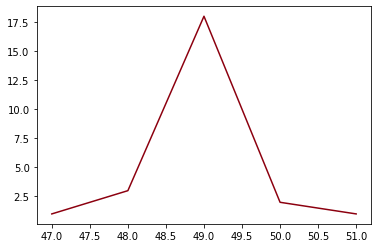

y,
in range mean +- 1d : [48.22515307716505, 49.694846922834955]
there are 18 samples
for Empirical Rule, in mean +- 1d have 68% of samples = 17.0
Chebyshev’s Theorem dose not define 1 stdev
there are 23 samples
CT guaranteed 18.750000, hence at least 19


In [318]:
import statistics as stat
import matplotlib.pyplot as plt
%matplotlib inline
ds = [47] + [48]*3 + [49]*18 + [50]*2 + [51]
x = [47, 48, 49, 50, 51]
f = [1, 3, 18, 2, 1]
#a
ds_mean = stat.mean(ds)
ds_stdev = stat.stdev(ds)
print("ds_maen = %f" %ds_mean, "ds_stdev = %f" %ds_stdev, sep ="\n")
#b
fig, ax = plt.subplots(facecolor = (1,1,1))
ax.plot(x, f, 'xkcd:crimson')
plt.show()
ds_1d = [ds_mean - ds_stdev, ds_mean + ds_stdev]
def smp_in_xd_calculator(ds, interval_min, interval_max):
    smp_count = 0
    for i in range(len(ds)):
        if ds[i] >= interval_min and ds[i] <= interval_max:
            smp_count += 1
        i += 1
    return smp_count
        
smp_in_1d = smp_in_xd_calculator(ds, ds_1d[0], ds_1d[1])
total_samples = sum(f)
print("y,", "in range mean +- 1d : %s" %ds_1d,
      "there are %d samples" %smp_in_1d,
      "for Empirical Rule, in mean +- 1d have 68%% of samples = %.1f" %(total_samples*0.68),
      sep = "\n")

#c
print("Chebyshev’s Theorem dose not define 1 stdev")
#d
ds_2d = [ds_mean - 2*ds_stdev, ds_mean + 2*ds_stdev]
smp_in_2d = smp_in_xd_calculator(ds, ds_2d[0], ds_2d[1])
CT_2d = (1 - (1/(2**2)))*total_samples
print("there are %d samples" %smp_in_2d,
     "CT guaranteed %f, hence at least %d" %(CT_2d, round(CT_2d, 0)), sep = "\n")

# CH 3 Descriptive Statistics

## CH 3.1 Sample Spaces, Events, and Their Probabilities
![3.1ex.1-1](https://raw.githubusercontent.com/ellickhou/Entrance-exam-of-Taiwan-AI-Academy/master/Notes-of-Beginning-Statistics/img/3.1ex.1-1.png)
![3.1ex.1-2](https://raw.githubusercontent.com/ellickhou/Entrance-exam-of-Taiwan-AI-Academy/master/Notes-of-Beginning-Statistics/img/3.1ex.1-2.png)

In [331]:
under20 = {"0":0.02, "1or2":0.14, "3more":0.08}
_20_29 = {"0":0.07, "1or2":0.37, "3more":0.11}
_30_and_above = {"0":0.1, "1or2":0.1, "3more":0.01}
under20_p = list(under20.values())
_20_29_p = list(_20_29.values())
_30_and_above_p = list(_30_and_above.values())
a = sum(_20_29_p)
b = sum(_20_29_p) + sum(_30_and_above_p)
c = under20["0"] + _20_29["0"] + _30_and_above["0"]
d = _20_29["3more"]
print("a = %.2f" %a, "b = %.2f" %b, "c = %.2f" %c, "d = %.2f" %d, sep = "\n")

a = 0.55
b = 0.76
c = 0.19
d = 0.11


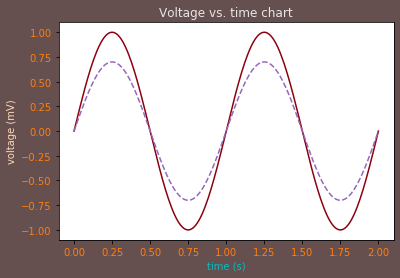

In [223]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0.0, 2.0, 201)
s = np.sin(2 * np.pi * t)

# 1) RGB tuple:facecolor=(.40, .31, .31)
fig, ax = plt.subplots(facecolor=(.40, .31, .31))
# 2) hex string:
ax.set_facecolor("white")
# 3) gray level string:
ax.set_title('Voltage vs. time chart', color='.9')
# 4) single letter color string
ax.set_xlabel('time (s)', color='c')
# 5) a named color:
ax.set_ylabel('voltage (mV)', color='peachpuff')
# 6) a named xkcd color:
ax.plot(t, s, 'xkcd:crimson')
# 7) Cn notation:
ax.plot(t, .7*s, color='C4', linestyle='--')
# 8) tab notation:
ax.tick_params(labelcolor='tab:orange')


plt.show()

In [224]:
help(plt.rc_context)

Help on function rc_context in module matplotlib.pyplot:

rc_context(rc=None, fname=None)
    Return a context manager for managing rc settings.
    
    This allows one to do::
    
        with mpl.rc_context(fname='screen.rc'):
            plt.plot(x, a)
            with mpl.rc_context(fname='print.rc'):
                plt.plot(x, b)
            plt.plot(x, c)
    
    The 'a' vs 'x' and 'c' vs 'x' plots would have settings from
    'screen.rc', while the 'b' vs 'x' plot would have settings from
    'print.rc'.
    
    A dictionary can also be passed to the context manager::
    
        with mpl.rc_context(rc={'text.usetex': True}, fname='screen.rc'):
            plt.plot(x, a)
    
    The 'rc' dictionary takes precedence over the settings loaded from
    'fname'.  Passing a dictionary only is also valid. For example a
    common usage is::
    
        with mpl.rc_context(rc={'interactive': False}):
            fig, ax = plt.subplots()
            ax.plot(range(3), range(3))
  